<a href="https://colab.research.google.com/github/Neethuharii/Foundatin-of-ML/blob/main/Neural%20Netwok/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
data=keras.datasets.fashion_mnist     #fasion_mnist is a dataset used for image classification task

split our data into training and testing data.

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


####Normalization

 normalization is a common preprocessing step in machine learning tasks, especially when working with neural networks. By dividing the pixel values by 255.0, you scale the values to be in the range [0, 1].

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

####Creating the Model

Our model will have 3 layers,
     input layer => 784 neurons(28*28)
     hidden layer => 128 neurons
     output layer => 10 neurons

In [9]:
model=keras.Sequential([                          #keras.Sequential is a API
    keras.layers.Flatten(input_shape=(28,28)),    #used to convert 2D to 1D
    keras.layers.Dense(128,activation="relu"),    #it is fully connected with 128 neurons, and relu os used for provide non linearity to the model
    keras.layers.Dense(10,activation="softmax")   #"     "                    10 neurons ,and softmax is used for multiclass classification prbm
])

####Training the Model

compile and train it. Compiling the model is just picking the optimizer, loss function and metrics to keep track of.

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])    #compile
model.fit(train_images, train_labels, epochs=5)                                                  #training

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4996 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3747 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3384 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3117 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2923 - accuracy: 0.8924


####Testing the Model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8755

Test accuracy: 0.8755000233650208


####Making Prediction

In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


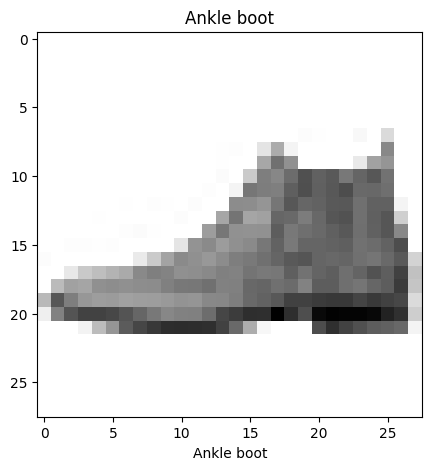

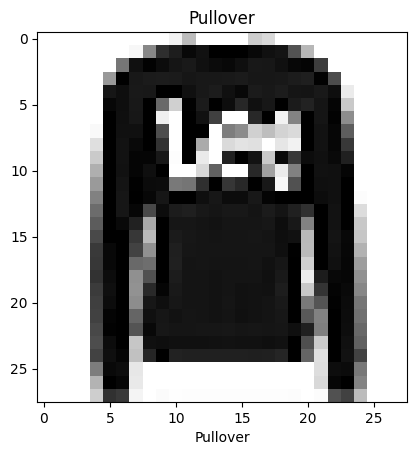

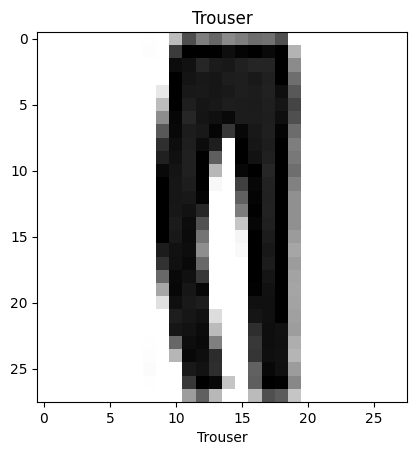

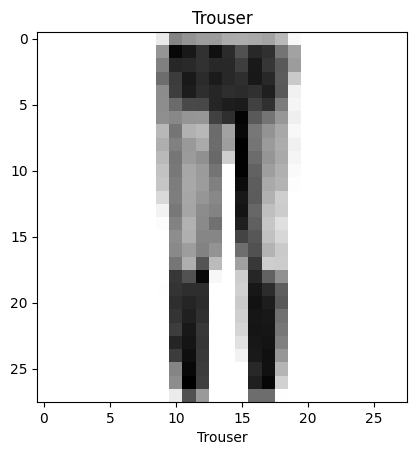

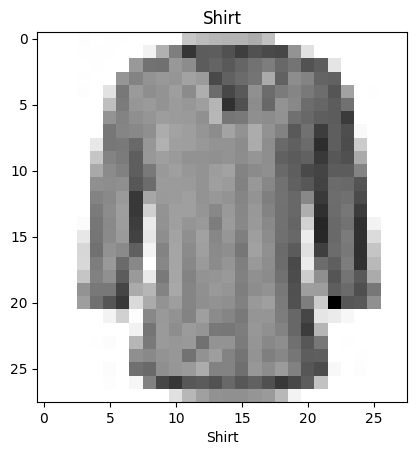

In [13]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()

#Test Classification

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy


In [15]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


####Integer Encoded Data

Each word in our reviews are represented as positive integers where each integer represents a specific word. This is necessary as we cannot pass strings to our neural network.

In [18]:
_word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in _word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
	return " ".join([reverse_word_index.get(i, "?") for i in text])

####Preprocessing the Data

We cannot pass different length data into out neural network

In [19]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

In [20]:
model = keras.Sequential()
model.add(keras.layers.Embedding(88000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()  # prints a summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          1408000   
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1408289 (5.37 MB)
Trainable params: 1408289 (5.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####Validation Data

The model will use the validation data to check accuracy after learning from the training data. This will hopefully result in us avoiding a false confidence for our model.

We can split our training data into validation data like so:

In [21]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

####Training the Model

In [24]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

###Saving the Model

In [ ]:
model.save("model.h5")